In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from simulator import Simulation

In [2]:
def plot_distribution(project_df):    
    fig, ax = plt.subplots(figsize=(15,5))
    project_df['token_amount'].plot(kind='bar', width=1, ax=ax)
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("Tokens")
    fig.show()
    
    
def plot_alignment(project_df):    
    fig, ax = plt.subplots(figsize=(15,5))
    project_df.plot(kind='scatter', x='rating', y='token_amount', ax=ax)
    ax.set_ylabel("Tokens")
    ax.set_xlabel("Impact")
    ax.set_xticks([])    
    fig.show()
    
def summarize(project_df):
    return (
        project_df[['num_votes', 'token_amount']]
        .describe()
        .T
        [['mean', '50%', 'max']]
        .applymap(int)
    )
    
def analyze_simulation(sim):
    project_df = pd.DataFrame(sim.get_project_data()).sort_values(by='token_amount', ascending=False)
    plot_distribution(project_df)    
    plot_alignment(project_df)
    print(summarize(project_df))

# Base Model

/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_41459/1671737422.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_41459/1671737422.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


               mean   50%     max
num_votes        25    18     107
token_amount  46656  4413  647272


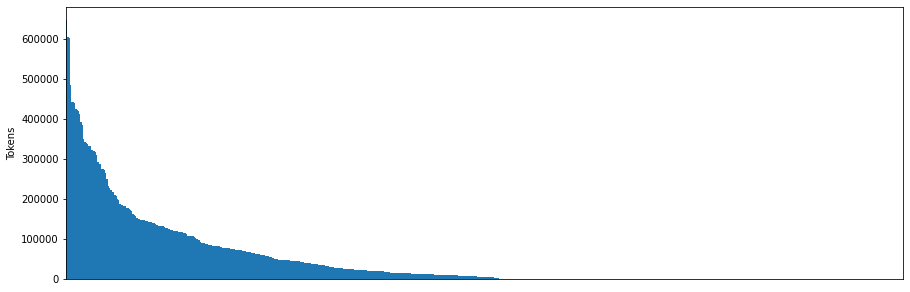

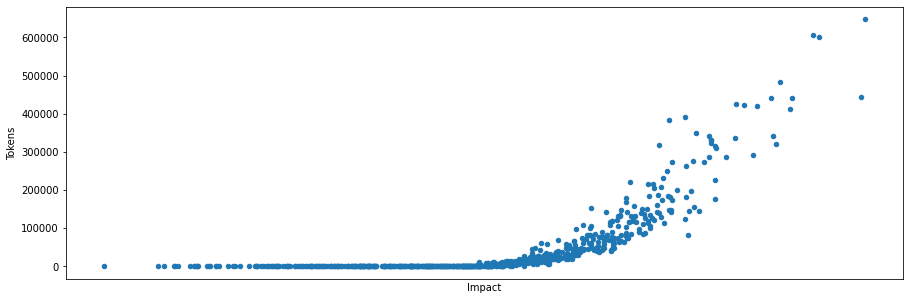

In [3]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000, 
    min_funding=1500, 
    quorum=17, 
    scoring_method='median'
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.6, 
    expertise_factor=0.7
)
simulation.randomize_projects(643)
simulation.simulate_voting()

analyze_simulation(simulation)

/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_41459/1671737422.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_41459/1671737422.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


               mean   50%     max
num_votes        63    55     218
token_amount  46656  9348  627628


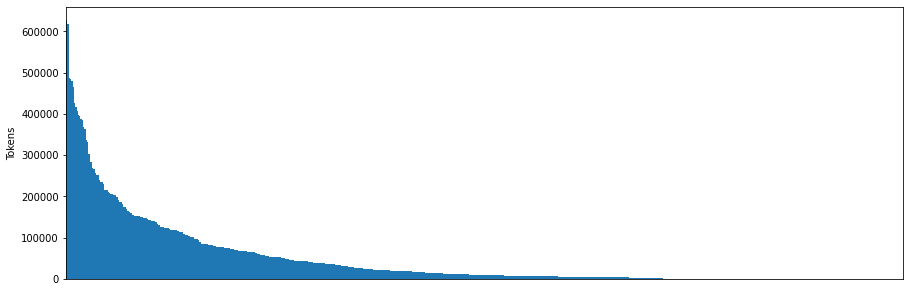

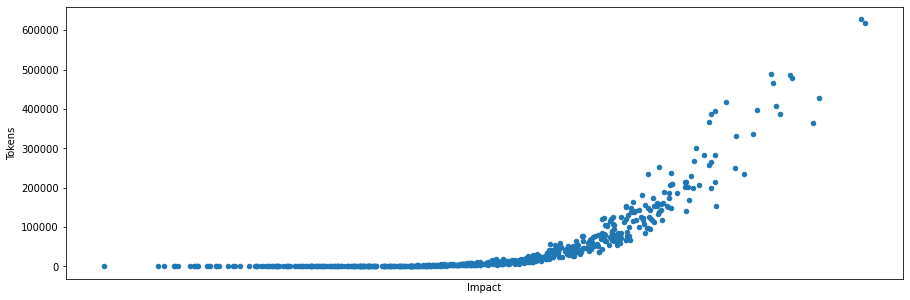

In [4]:
simulation.reset_round()
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1, 
    laziness_factor=0.2, 
    expertise_factor=0.7
)
simulation.simulate_voting()
analyze_simulation(simulation)

In [ ]:
simulation.reset_round()
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1, 
    laziness_factor=0.6, 
    expertise_factor=0.7
)
simulation.simulate_voting(abstains_are_zeroes=True)
analyze_simulation(simulation)

In [ ]:
simulation.reset_round(scoring_method='QF')
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1, 
    laziness_factor=0.6, 
    expertise_factor=0.7
)
simulation.simulate_voting()
analyze_simulation(simulation)

In [ ]:
simulation.reset_round(scoring_method='mean')
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1, 
    laziness_factor=0.6, 
    expertise_factor=0.7
)
simulation.simulate_voting()
analyze_simulation(simulation)